In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import matplotlib
import seaborn as sns

df = pd.read_csv("globalterrorismdb_0522dist.csv", low_memory=False)

In [7]:
df = df[['iyear', 'iday', 'imonth', 'country', 'country_txt', 'region', 'region_txt', 'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1', 'attacktype1_txt','targtype1','targsubtype1','nwound','natlty1','nkill']]
df.to_csv('filtered_data_globalterrorism1.csv', index=False)

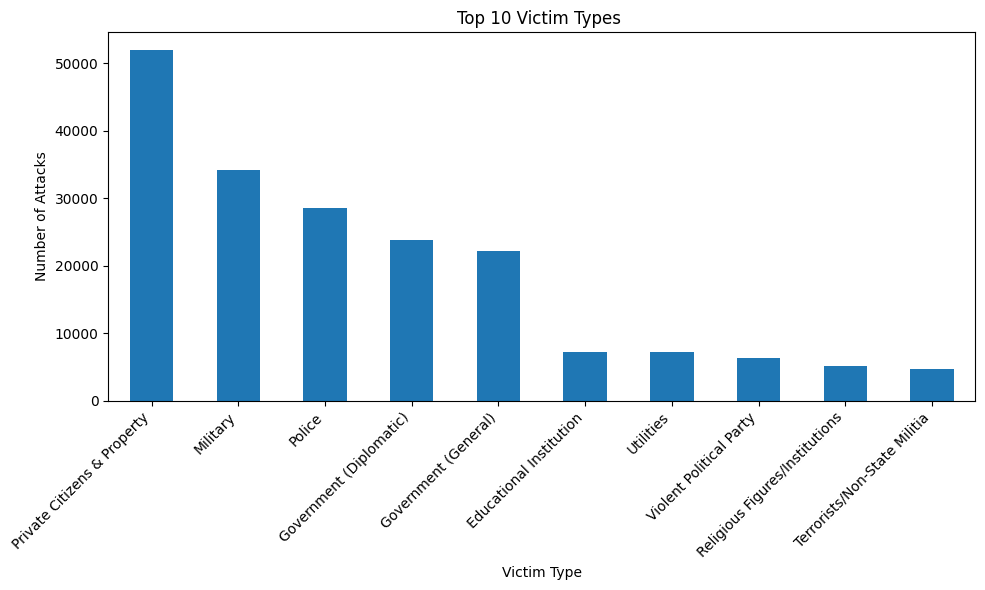

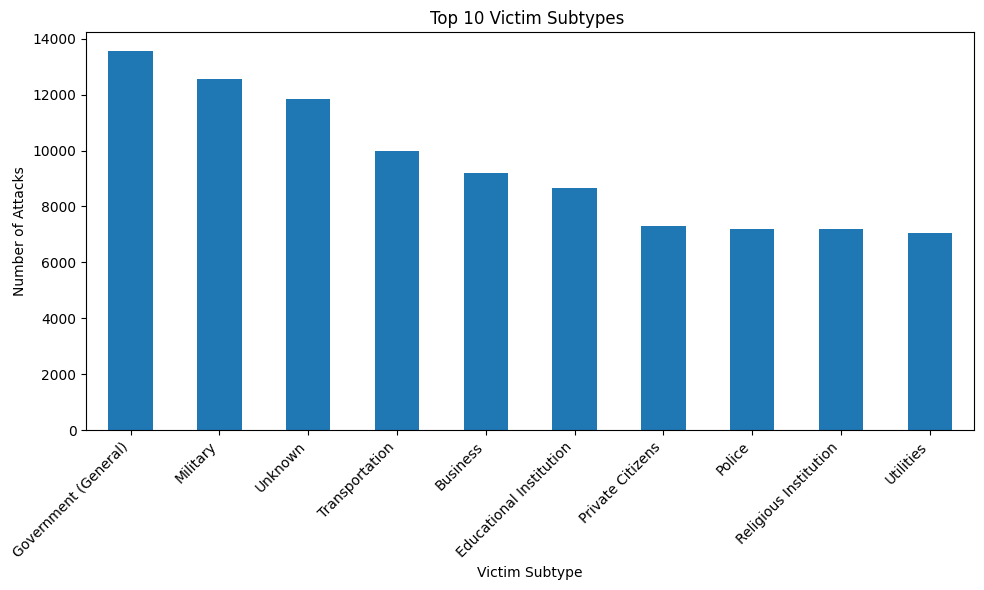

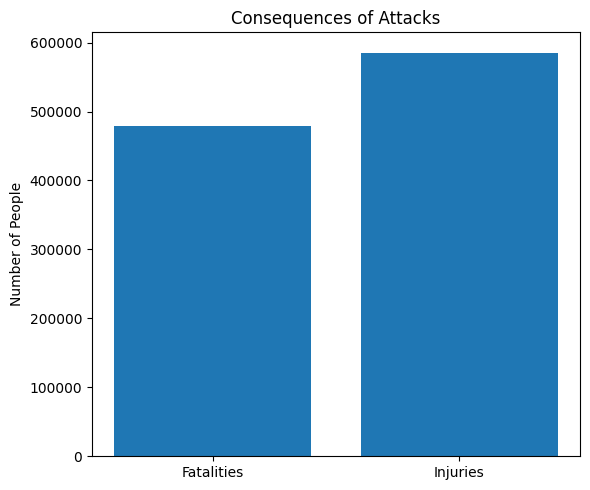

Total fatalities: 479348
Total injuries: 585606


In [24]:
df['targtype1'] = df['targtype1'].fillna(-1)
df['targsubtype1'] = df['targsubtype1'].fillna(-1)
df['natlty1'] = df['natlty1'].fillna(-1)
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)

targtype1_map = {
    1: 'Government (General)',
    2: 'Government (Diplomatic)',
    3: 'Police',
    4: 'Military',
    5: 'Abortion Related',
    6: 'Airports & Aircraft',
    7: 'Business',
    8: 'Terrorists/Non-State Militia',
    9: 'Food or Water Supply',
    10: 'Journalists & Media',
    11: 'Maritime',
    12: 'NGO',
    13: 'Other',
    14: 'Private Citizens & Property',
    15: 'Religious Figures/Institutions',
    16: 'Telecommunication',
    17: 'Tourists',
    18: 'Transportation',
    19: 'Utilities',
    20: 'Educational Institution',
    21: 'Violent Political Party'
}

targsubtype1_map = {
    -1: 'Unknown',
    15: 'Police',
    18: 'Private Citizens',
    22: 'Religious Institution',
    25: 'Military',
    27: 'Utilities',
    29: 'Business',
    34: 'Transportation',
    67: 'Government (General)',
    75: 'Educational Institution'
}

df['targtype1_label'] = df['targtype1'].map(targtype1_map)
df['targsubtype1_label'] = df['targsubtype1'].map(targsubtype1_map)

top_target_labels = df['targtype1_label'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_target_labels.plot(kind='bar')
plt.title('Top 10 Victim Types ')
plt.xlabel('Victim Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

top_subtype_labels = df['targsubtype1_label'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_subtype_labels.plot(kind='bar')
plt.title('Top 10 Victim Subtypes ')
plt.xlabel('Victim Subtype')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

total_killed = df['nkill'].sum()
total_wounded = df['nwound'].sum()

plt.figure(figsize=(6, 5))
plt.bar(['Fatalities', 'Injuries'], [total_killed, total_wounded])
plt.title('Consequences of Attacks')
plt.ylabel('Number of People')
plt.tight_layout()
plt.show()

print(f"Total fatalities: {int(total_killed)}")
print(f"Total injuries: {int(total_wounded)}")



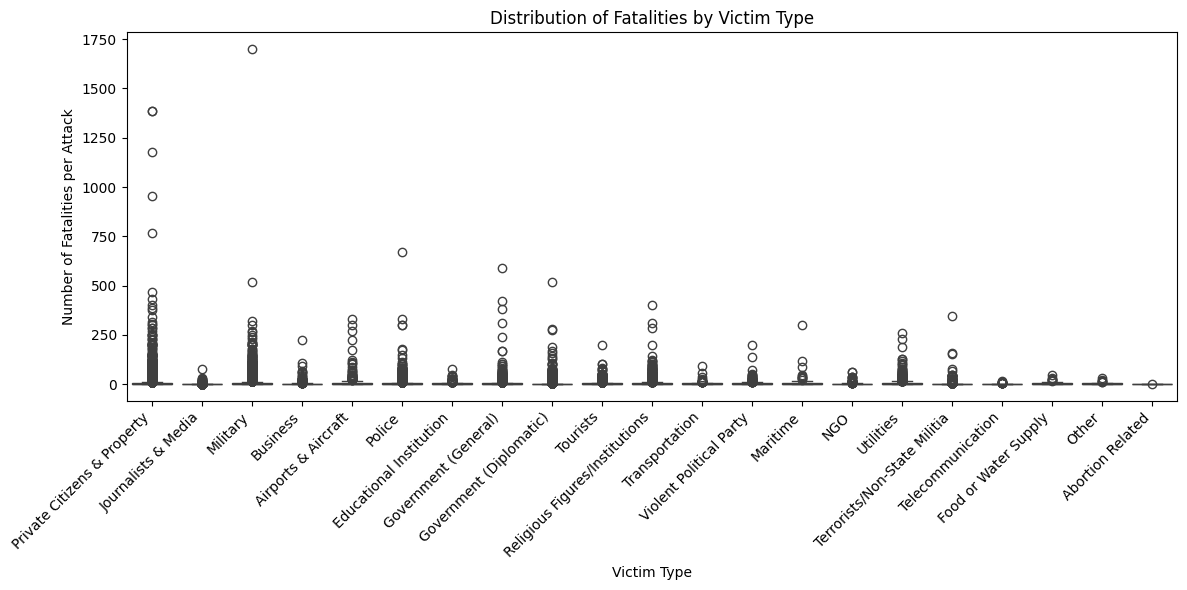

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['targtype1_label'].notna() & (df['nkill'] > 0)],
            x='targtype1_label', y='nkill')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Fatalities by Victim Type')
plt.xlabel('Victim Type')
plt.ylabel('Number of Fatalities per Attack')
plt.tight_layout()
plt.show()


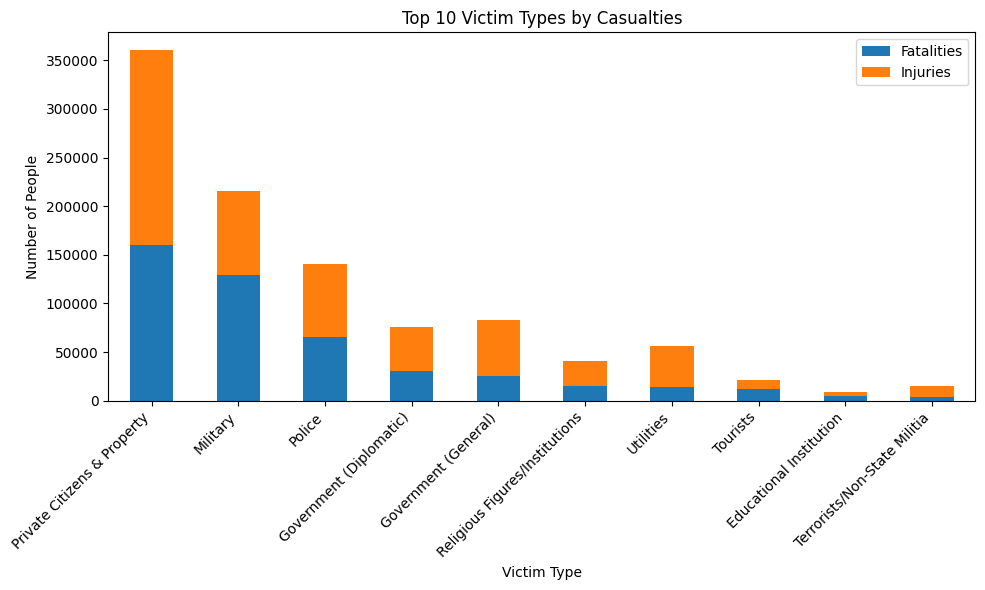

In [26]:
casualties_by_type = df.groupby('targtype1_label')[['nkill', 'nwound']].sum().sort_values(by='nkill', ascending=False).head(10)

casualties_by_type.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Victim Types by Casualties')
plt.xlabel('Victim Type')
plt.ylabel('Number of People')
plt.xticks(rotation=45, ha='right')
plt.legend(['Fatalities', 'Injuries'])
plt.tight_layout()
plt.show()


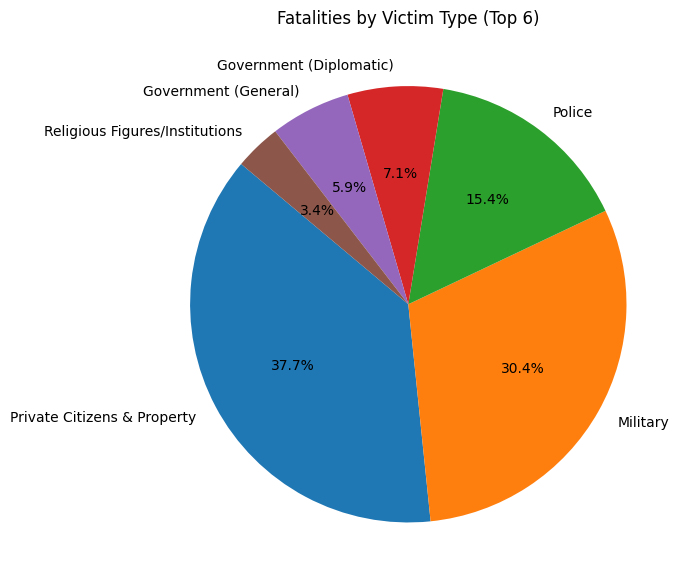

In [27]:
fatalities_by_type = df.groupby('targtype1_label')['nkill'].sum().sort_values(ascending=False).head(6)
plt.figure(figsize=(7, 7))
fatalities_by_type.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Fatalities by Victim Type (Top 6)')
plt.ylabel('')
plt.tight_layout()
plt.show()


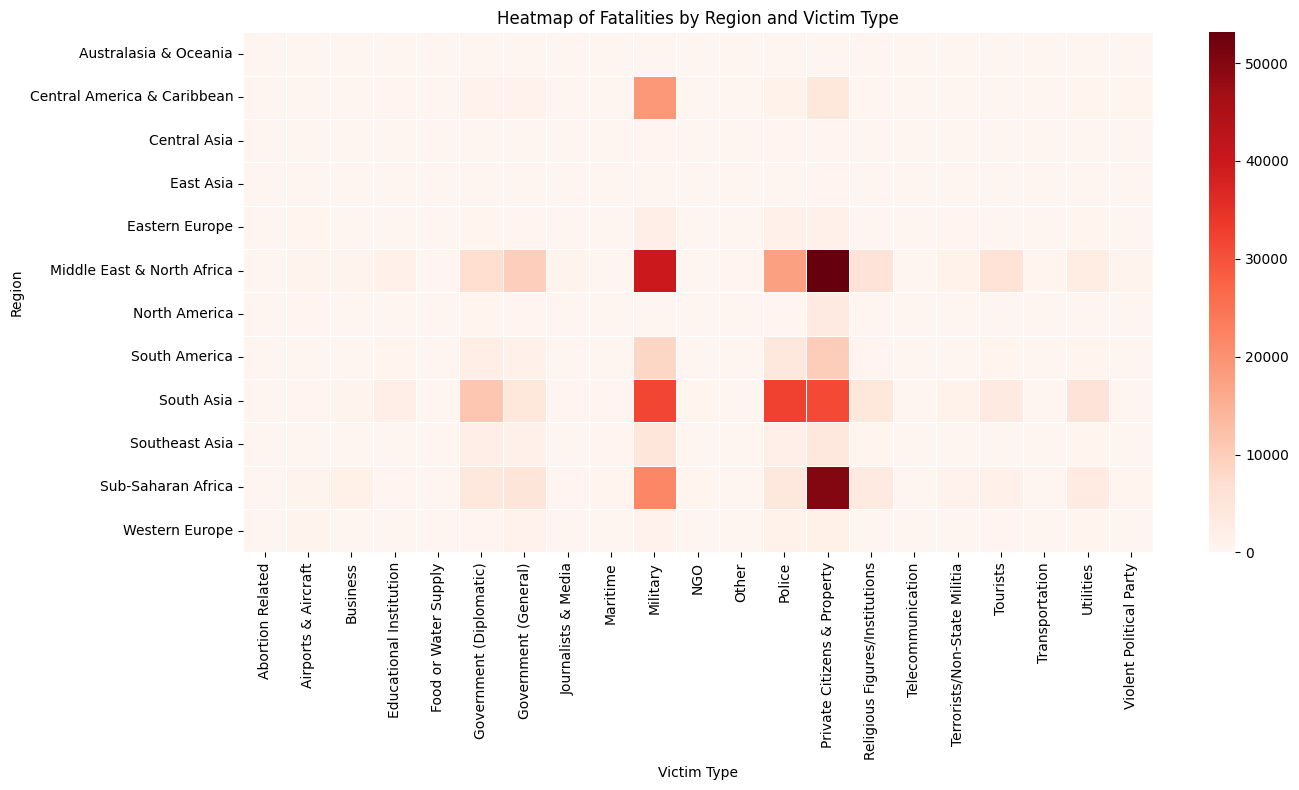

In [28]:
heatmap_data = df.pivot_table(index='region_txt', columns='targtype1_label', values='nkill', aggfunc='sum').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5)
plt.title('Heatmap of Fatalities by Region and Victim Type')
plt.xlabel('Victim Type')
plt.ylabel('Region')
plt.tight_layout()
plt.show()
